In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike_train=pd.read_excel("bike_train.xlsx")

In [3]:
bike_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_test=pd.read_excel("bike_test.xlsx")

# ANÁLISIS EXPLORATIORIO DE DATOS

Analizamos las columnas y el tipo de dato de las mismas

In [5]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

Vemos si existen columnas con datos nulos

In [6]:
bike_train.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observamos la descripción de los datos de las columnas

In [7]:
bike_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


# Reducción de dimensionalidades

## Realizamos las distintas correlaciones para observar que valores poseen mayor relación con la cantidad de bicicletas usadas en esos instantes

### Correlación de Pearson

In [8]:
corr_pearson=bike_train.corr('pearson')

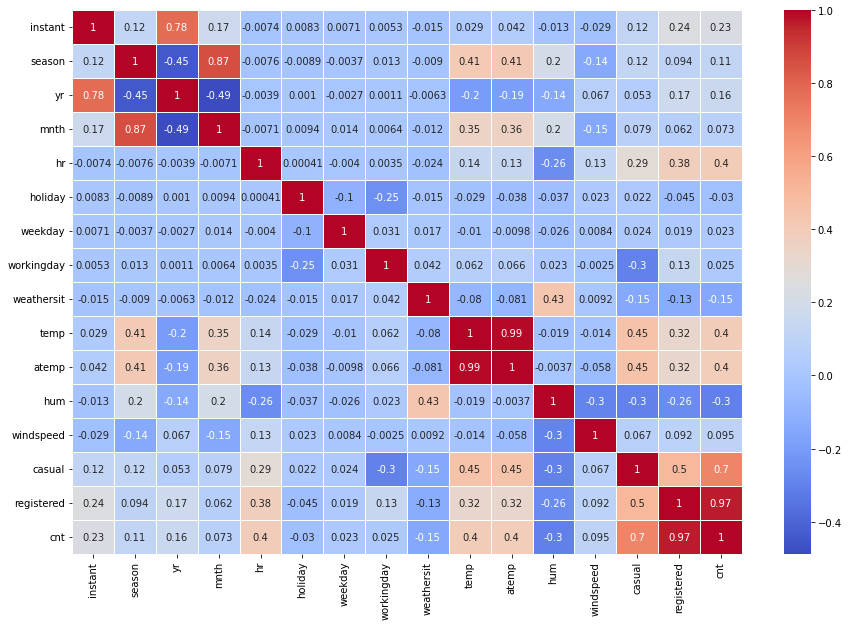

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_pearson, cmap= 'coolwarm', linewidth = 0.5,annot=True)
plt.show()

### Correlación de Kendall

In [10]:
corr_kendall=bike_train.corr('kendall')

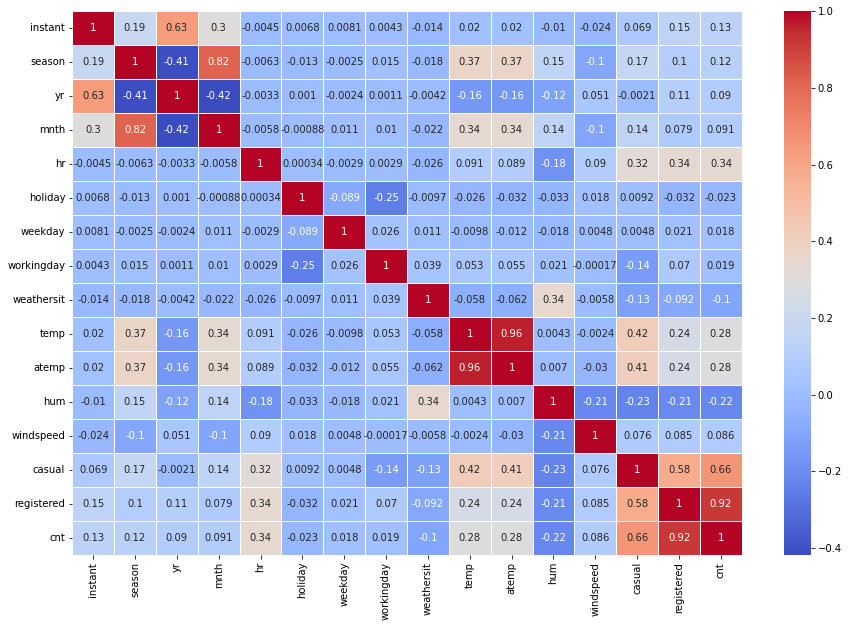

In [11]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_kendall, cmap= 'coolwarm', linewidth = 0.5,annot=True)
plt.show()

### Correlación de Spearman

In [12]:
corr_spear=bike_train.corr('spearman')

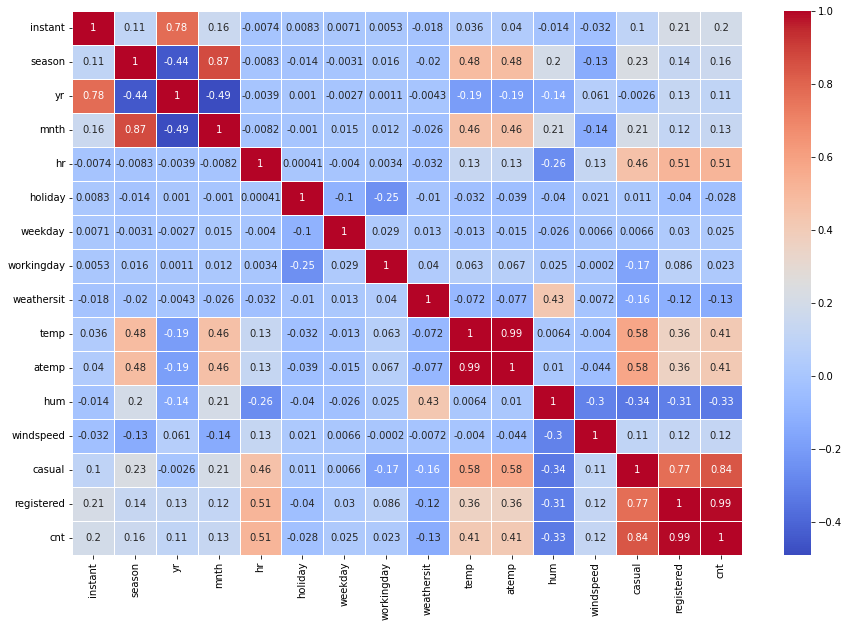

In [13]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_spear, cmap= 'coolwarm', linewidth = 0.5,annot=True)
plt.show()

Tomaremos las columnas que posean un valor de correlación mayor a 0.2. Por lo que las columnas a utilizar son instant, hr, temp, atemp, hum, casual y registered

In [14]:
bike_train_red=bike_train[['instant','hr','temp','atemp','hum','casual','registered','cnt']]

<AxesSubplot:xlabel='hr', ylabel='cnt'>

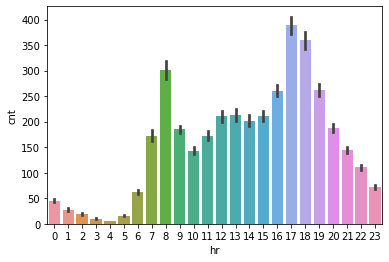

In [15]:
sns.barplot(data=bike_train,x='hr',y='cnt')

<AxesSubplot:xlabel='temp', ylabel='Count'>

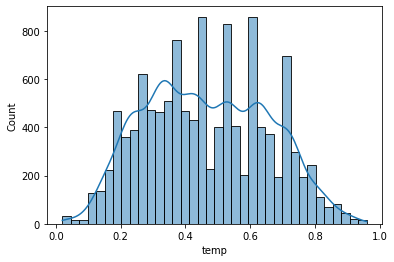

In [16]:
sns.histplot(data=bike_train_red['temp'],kde=True)

In [17]:
bike_train_red

,instant,hr,temp,atemp,hum,casual,registered,cnt
0,1,0,0.24,0.2879,0.81,3,13,16
1,2,1,0.22,0.2727,0.80,8,32,40
2,3,2,0.22,0.2727,0.80,5,27,32
3,4,3,0.24,0.2879,0.75,3,10,13
4,5,4,0.24,0.2879,0.75,0,1,1
...,...,...,...,...,...,...,...,...
11994,11995,23,0.60,0.6212,0.56,71,168,239
11995,11996,0,0.58,0.5455,0.53,42,128,170
11996,11997,1,0.56,0.5303,0.52,28,102,130
11997,11998,2,0.56,0.5303,0.52,36,62,98


# Implementación de modelos

## K Vecinos Cercanos

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=bike_train_red.drop(columns={'cnt','casual','registered'},axis=1)
y=bike_train_red.cnt

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
n_neighbors=5
regression_knn= KNeighborsRegressor(n_neighbors=n_neighbors)

In [24]:
regression_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [25]:
y_train_pred = regression_knn.predict(X_train)
y_test_pred = regression_knn.predict(X_test)

### Evaluación de precisión del modelo

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [27]:
print('La precisión del KNN en set de train es:', regression_knn.score (X_train,y_train))
print('La precisión del KNN en set de test es:', regression_knn.score (X_test,y_test))

La precisión del KNN en set de train es: 0.809976142069146
La precisión del KNN en set de test es: 0.6981967244369931


In [28]:
rsme=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("El error es:",rsme)

El error es: 9.06749960246094


# Predicción de datos

Tomamos en cuenta las columnas con las que dimensionamos 

In [29]:
bike_test=bike_test[['instant','hr','temp','atemp','hum']]

In [30]:
y_test_prediction=regression_knn.predict(bike_test)

c:\Users\Adm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [31]:
pred=pd.DataFrame(y_test_prediction,columns={'pred'})

In [32]:
pred=pred.astype(int)

In [35]:
pred.to_csv("diegobarrios224.csv",index=False)